# Numerical Simulation of the 2-Body Problem

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## _i)_

In [345]:

def euler(w0,s0,h,e):
      #the function will take the initial velocity
    # initial position, the whished step size 
    # and the desired upper bondary for the integral
    
    G = 1 #grativational constant
    m = 1 #mass of both bodies
    N = int(e/h) #time steps
    
    s = np.zeros((N,2))
    w = np.zeros((N,2))
    LRL = np.zeros((N,2))
    s[0] = s0
    w[0] = w0
    #leap-frog algorith
    for i in range(N-1):
        s[i+1] = s[i] + h*w[i]
        w[i+1] = w[i]-h*s[i]/np.linalg.norm(s[i])**3
         #calculatin LRl for every time step
        LRL[i] = s[i]*(np.dot(w[i],w[i])) - w[i]*(np.dot(s[i],w[i])) - s[i]/np.linalg.norm(s[i])

    #calculating eccentrisity with LRL
    epsilon = np.mean([np.linalg.norm(x) for x in LRL])
    print(np.linalg.norm(LRL[1]))
    #calculatin eccentrisity geometrically
    a = max(s[:,0])- min(s[:,0])
    b = max(s[:,1])-min(s[:,1])
    print(a)
    print(b)
    epsilon2 = np.sqrt(abs(1-a**2/b**2))
    print('epislon calculated geometrically :{:.3}'.format(epsilon2))
    #plot
    fig1, ax1 = plt.subplots()
    t = np.linspace(0,e,N)
    ax1.plot(t,s[:,1], label= r'$\omega$$_0$ = {} $\quad$s$_0$ = {},$\quad$ $\;$ dt = {}'.format(s0,w0,h))
    plt.title('Motion of 2-body problem body problem with $\epsilon = {:.3}$'.format(epsilon))
    plt.xlabel(' time t')
    plt.ylabel('relative position $s_1$')
    plt.legend(loc = 8)
    fig2, ax2 = plt.subplots()
    ax2.plot(s[:,0], s[:,1],  label= r'$\omega$$_0$ = {} $\quad$s$_0$ = {},$\quad$ $\;$ dt = {}'.format(w0,s0,h))
    plt.title('Orbit of the 2-body problem with $\epsilon = {:.3}$'.format(epsilon))
    plt.xlabel('relative position $s_1$')
    plt.ylabel('relative position $s_2$')
    plt.legend(loc = 8)


1.5000003749539096e-06
2.1054507526942885
2.0993082373604404
epislon calculated geometrically :0.0766


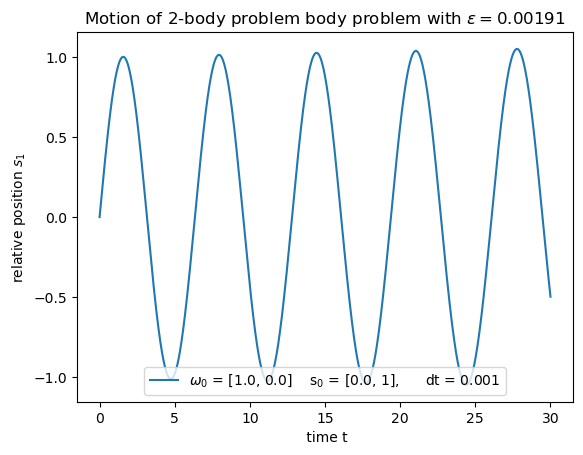

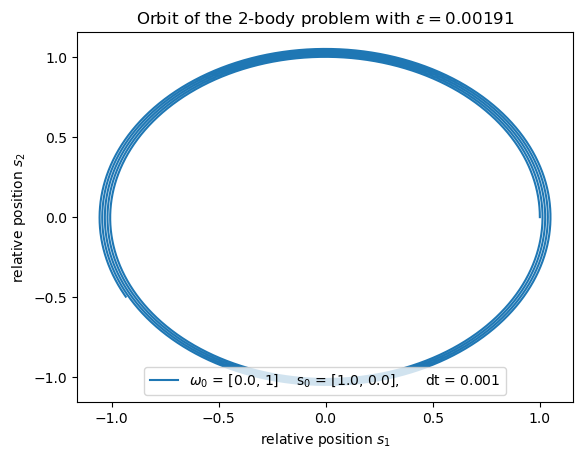

In [347]:
w1 = [0.0,1]
s1=[1.0,0.0]
euler(w1,s1,0.001,30)

In [332]:
def leap_frog(w0,s0,h,e):
     #the function will take the initial velocity
    # initial position, the whished step size 
    # and the desired upper bondary for the integral
    G = 1 #grativational constant
    m = 1 #mass of both bodies
    N = int(e/h) #time steps
    
    s = np.zeros((N,2))
    w = np.zeros((N,2))
    LRL = np.zeros((N,2))

    w[0] = w0
    s[0] = s0

    #First the programm will compute the s_1/2 step using the
    #euler forward methode
    a = 0.5*h/np.linalg.norm(s0)**3
    wn = w[0] - h/2*s[0]/np.linalg.norm(s[0])
    s[0] = s0 + h*wn
    
    #leap-frog algorith
    for i in range(N-1):
        w[i + 1] = w[i]-h/2*s[i]/np.linalg.norm(s[i])**3
        s[i + 1] = s[i] + w[i]*h
         #calculatin LRl for every time step
        LRL[i] = s[i]*(np.dot(w[i],w[i])) - w[i]*(np.dot(s[i],w[i])) - s[i]/np.linalg.norm(s[i])

    #calculating eccentrisity with LRL
    epsilon = np.mean([np.linalg.norm(x) for x in LRL])
    #calculatin eccentrisity geometrically
    a = max(s[:,0])- min(s[:,0])
    b = max(s[:,1])-min(s[:,1])
    print(a)
    print(b)
    epsilon2 = np.sqrt(abs(1-b**2/a**2))
    print('epislon calculated geometrically :{:.3}'.format(epsilon2))
    #plot
    fig1, ax1 = plt.subplots()
    t = np.linspace(0,e,N)
    ax1.plot(t,s[:,1], label= r'$\omega$$_0$ = {} $\quad$s$_0$ = {},$\quad$ $\;$ dt = {}'.format(s0,w0,h))
    plt.title('Motion of 2 body problem with $\epsilon$ = {:.3}'.format(epsilon))
    plt.xlabel(' time t')
    plt.ylabel('relative position $s_1$')
    plt.legend(loc = 8)
    fig2, ax2 = plt.subplots()
    ax2.plot(s[:,0], s[:,1],  label= r'$\omega$$_0$ = {} $\quad$s$_0$ = {},$\quad$ $\;$ dt = {}'.format(s0,w0,h))
    plt.title('Orbit of the 2-body problem with $\epsilon$ = {:.3}'.format(epsilon))
    plt.xlabel('relative position $s_1$')
    plt.ylabel('relative position $s_2$')
    plt.legend(loc = 8)

1.992265652834932
1.9961493469569298
epislon calculated geometrically :0.0625


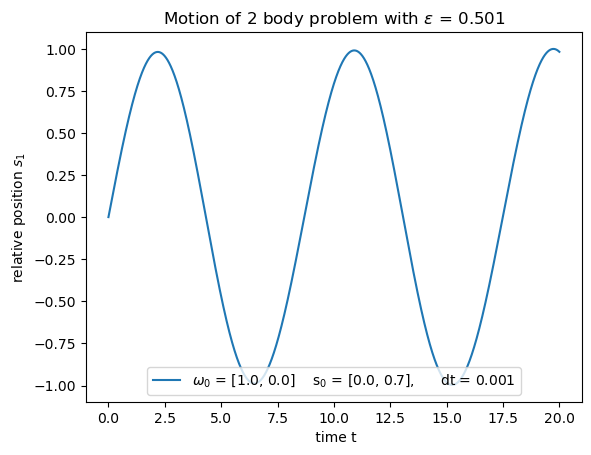

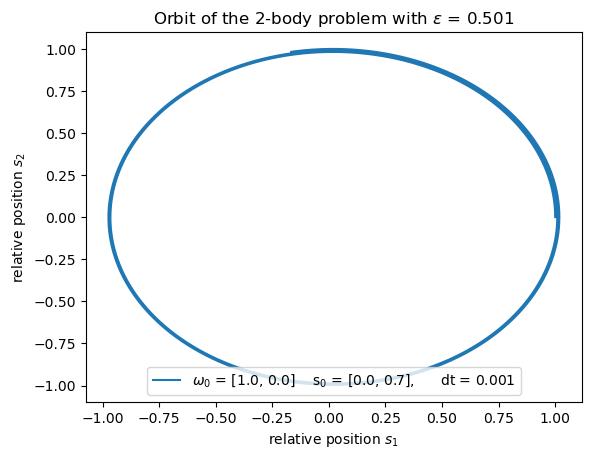

In [354]:
w2 = [0.0,.70]
s2=[1.0,0.0]
leap_frog(w2,s2,0.001,20)

# _ii)_

After changing the paramters of the Euler Forward Method it has been stablished, that due to the errors of this method it is not posible to get a perfect circle with radius 1. However with $\omega_0$ =(0, 1.0) the programm delivers a good approximation. In the other hand,  for the leap-frog algorith to deliver a good approximation the inital velocity has to be set to $\omega_0$ = (0,0.7)

## _iii)_

0.00015000374993734167
2.7516943302449928
2.6964787836941415
epislon calculated geometrically :0.203


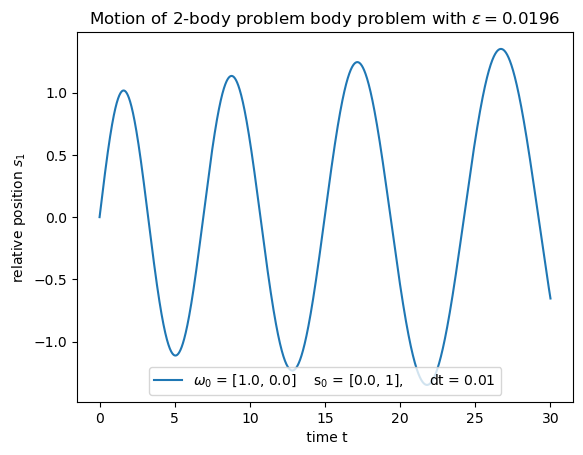

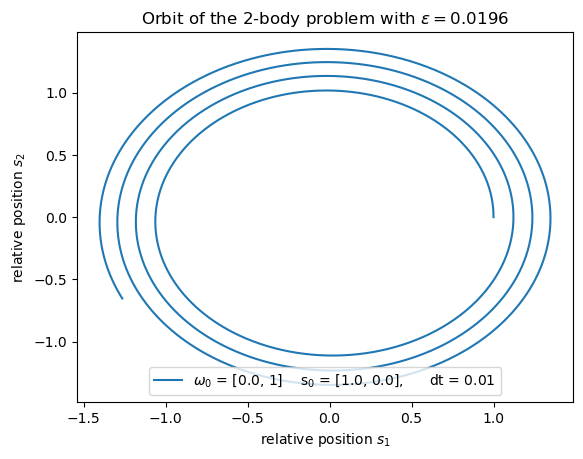

In [357]:
w1 = [0.0,1]
s1=[1.0,0.0]
euler(w1,s1,0.01,30)

4.241240714984339
4.1951887488190645
epislon calculated geometrically :0.147


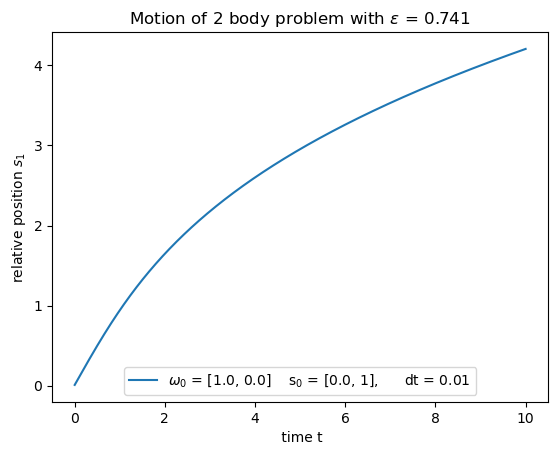

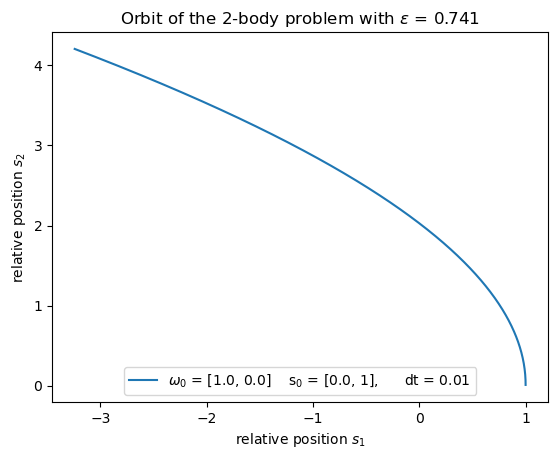

In [359]:
leap_frog(w1,s1,0.01,10)
#for the leap_frog algorith the increase in the distance is lower about 0.01%

If the time step is increased the exactitude of both methods decrease greatlly. The Euler Method plots a piral trajectory, meanwhile the leap-frog algorithm shows a hyperbola.

## _v)_

1.0000029999985007
5.808259981521099
4.827925218332602
epislon calculated geometrically :0.669


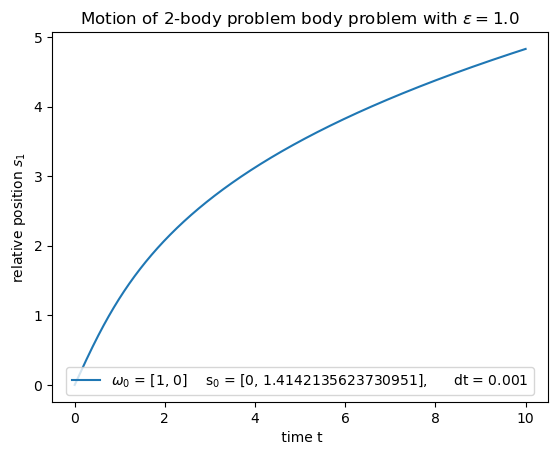

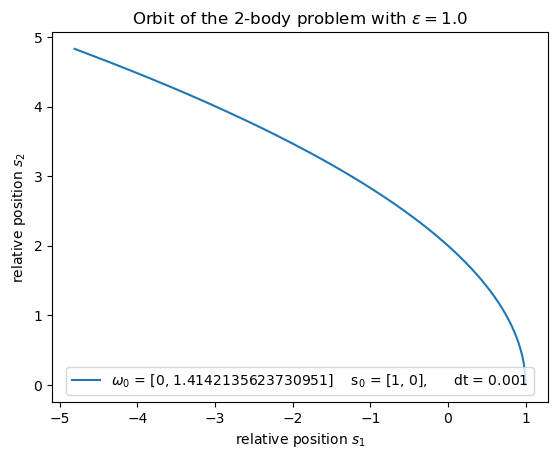

In [360]:
euler([0,np.sqrt(2)],[1,0], 0.001,10)

3.3165115257055158
10.712525087721502
epislon calculated geometrically :3.07


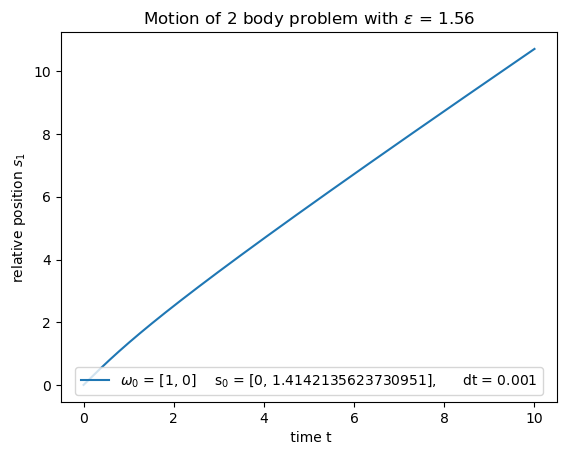

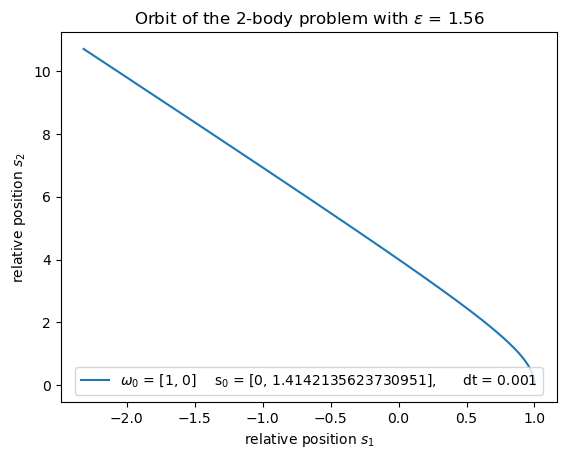

In [361]:
leap_frog([0,np.sqrt(2)],[1,0], 0.001,10)

0.49999999250000005
1.3480258576967694
1.1675373818253267
epislon calculated geometrically :0.577


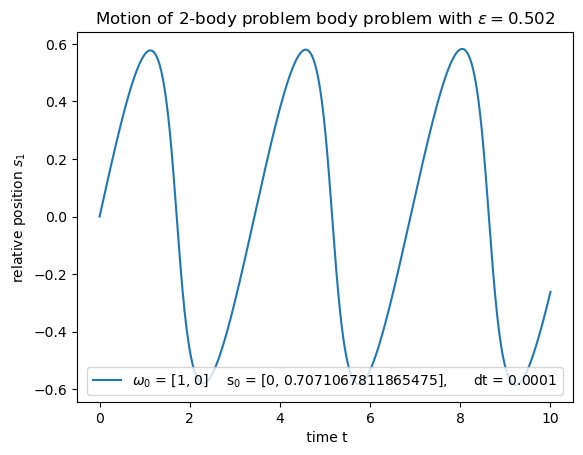

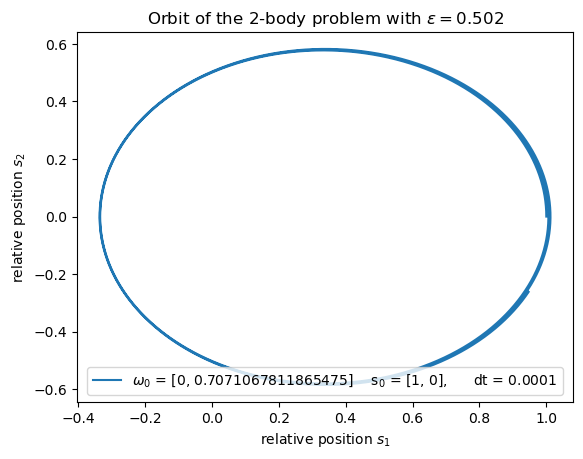

In [366]:
euler([0,1/np.sqrt(2)],[1,0], 0.0001,10)

0.9374999990624999
5.826402201122185
0.7323313689795644
epislon calculated geometrically :7.89


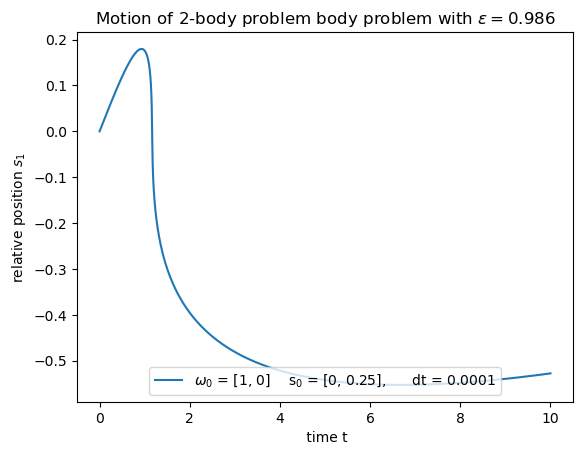

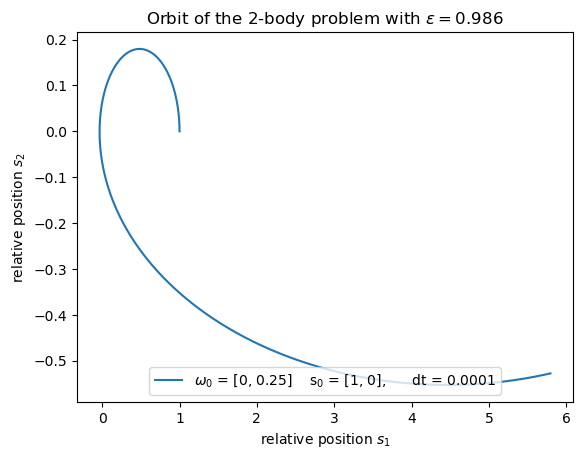

In [365]:
euler([0,1/4],[1,0], 0.0001,10)

2.001332646540053
2.000888510189057
epislon calculated geometrically :0.0211


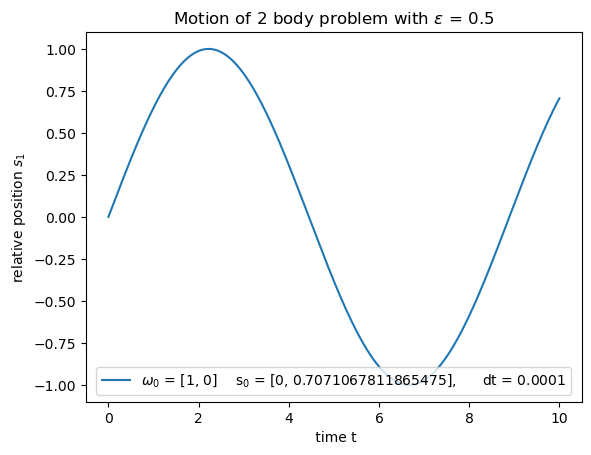

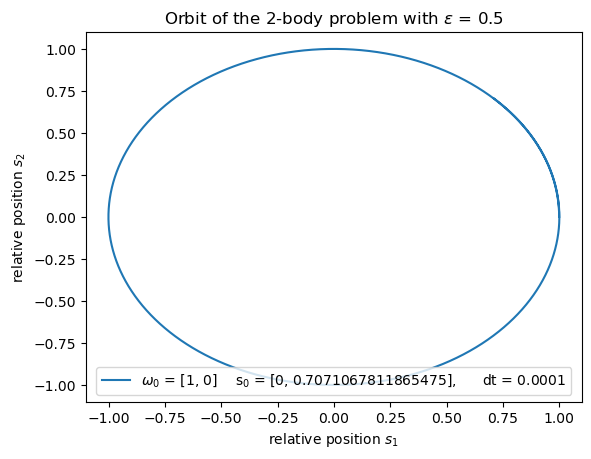

In [368]:
leap_frog([0,1/np.sqrt(2)],[1,0], 0.0001,10)

1.3808830743106262
0.5770487824456738
epislon calculated geometrically :0.909


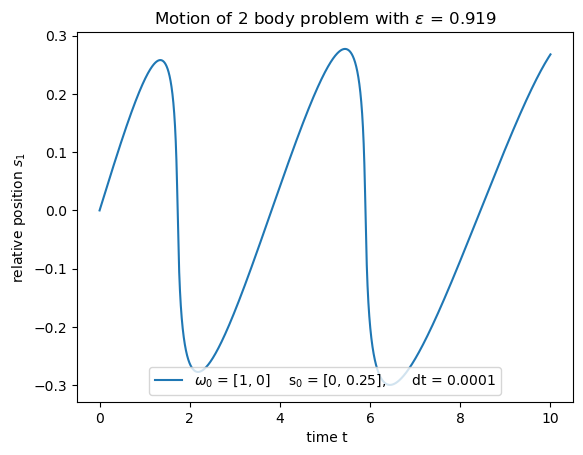

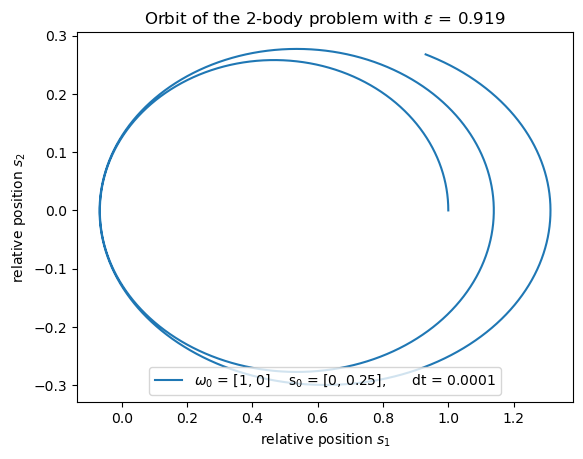

In [369]:
leap_frog([0,1/4],[1,0], 0.0001,10)